# Playing with Diagrams

Another display option for IHaskell is [diagrams](https://archives.haskell.org/projects.haskell.org/diagrams/)

We walk through the tutorial a bit, and see what it does and how it could be used. I already have a hunch that this is not going to be a replacement for charts, because well, it's not doing charts :-).

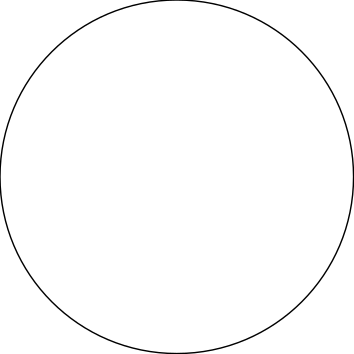

In [1]:
{-# LANGUAGE NoMonomorphismRestriction #-}
{-# LANGUAGE FlexibleContexts          #-}
{-# LANGUAGE TypeFamilies              #-}

import Diagrams.Prelude
import Diagrams.Backend.Cairo.CmdLine

myCircle :: Diagram B
myCircle = circle 1

diagram myCircle

The `#` operator is just reverse function application, which gives a nice touch to the DSL.

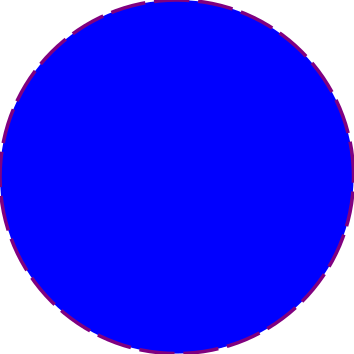

In [2]:
diagram $ myCircle # fc blue
                   # lw veryThick
                   # lc purple
                   # dashingG [0.2, 0.05] 0

In [3]:
:t fc -- transform a by applying a foreground color?

fc :: forall a. (Floating (N a), Typeable (N a), HasStyle a, V a ~ V2) => Colour Double -> a -> a

A somewhat less trivial example, creating a bunch of small circles on top of the border points of a regular polygon.

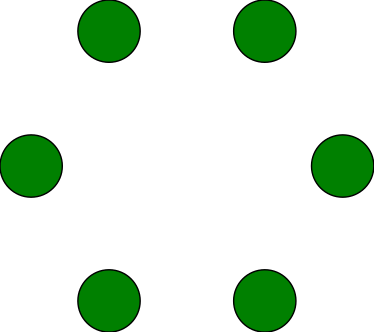

In [4]:

pointsOnPolygonBorder =
  let poly = regPoly 6 1
      node = circle 0.2 # fc green
  in atPoints (trailVertices poly) (repeat node) -- (take 5 $ repeat node) gives us 5 nodes, one empty spot
  
diagram pointsOnPolygonBorder

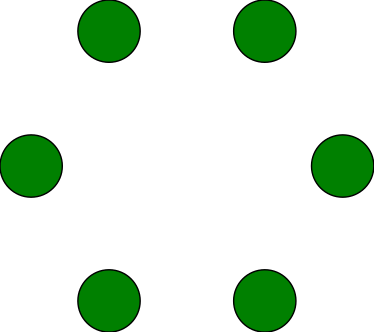

In [5]:

pointsOnPolygonBorder =
  let poly = regPoly 6 1
      node = circle 0.2 # fc green
  in atPoints (trailVertices poly) (repeat node) -- (take 5 $ repeat node) gives us 5 nodes, one empty spot
  
diagram pointsOnPolygonBorder

In [6]:
:type trailVertices -- provides a list of points (positions?) based on some weird-looking type class
:type atPoints -- given a list of positions, combine the [a] things into a single a

trailVertices :: forall (v :: * -> *) n. (Metric v, Floating n, Ord n) => Located (Trail v n) -> [Point v n]

atPoints :: forall a. (Additive (V a), Num (N a), HasOrigin a, Monoid a) => [Point (V a) (N a)] -> [a] -> a

### Ring Graph Drawing

A small generalization of the ideas in the tutorial: feed a number of vertices and a predicate over pairs of vertices into a function to create a ring graph with directed edges `(v1, v2)` if `pred v1 v2` is true.

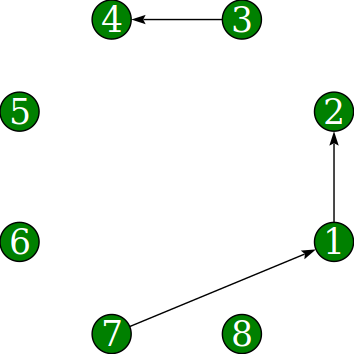

[(toName 1,[P (V2 1.2071067811865475 (-0.4999999999999996))]),(toName 2,[P (V2 1.2071067811865472 0.5000000000000004)]),(toName 3,[P (V2 0.49999999999999967 1.207106781186548)]),(toName 4,[P (V2 (-0.5000000000000003) 1.2071067811865477)]),(toName 5,[P (V2 (-1.207106781186548) 0.5000000000000001)]),(toName 6,[P (V2 (-1.207106781186548) (-0.4999999999999999))]),(toName 7,[P (V2 (-0.5000000000000003) (-1.2071067811865475))]),(toName 8,[P (V2 0.49999999999999967 (-1.2071067811865475))])]

In [72]:
import Data.List (foldl')

ringGraph :: Int -> (Int -> Int -> Bool) -> Diagram B
ringGraph n edgeP =
  let poly   = regPoly n 1
      node :: Int -> Diagram B
      node i = text (show i ) # fontSizeL 0.2 # fc white 
             <> circle 0.15 # fc green # named i -- named: assign a name to an object, to reference it later
      edges = [(v1, v2) | v1 <- [1 .. n], v2 <- [1..n], edgeP v1 v2]
      edgeF = foldl' (.) id $ map (uncurry connectOutside) edges -- compose all arrow drawing functions into one
  in atPoints (trailVertices poly) (map node [1..]) # edgeF

edges = [(3, 4), (7, 1), (1, 2)] :: [(Int, Int)]
d = ringGraph 8 (\x y -> (x, y) `elem` edges)
diagram d

names d -- print all the existing names in a diagram


In [73]:
:doc Traversable